In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
gold_df=pd.read_csv('gold.csv') # reading the file
gold_df

,Date,Open,High,Low,Close,Volume,Currency
0,2000-01-04,289.5,289.50,280.00,283.7,21621,USD
1,2000-01-05,283.7,285.00,281.00,282.1,25448,USD
2,2000-01-06,281.6,282.80,280.20,282.4,19055,USD
3,2000-01-07,282.5,284.50,282.00,282.9,11266,USD
4,2000-01-10,282.4,283.90,281.80,282.7,30603,USD
...,...,...,...,...,...,...,...
5698,2022-08-29,1748.4,1757.90,1731.40,1749.7,156220,USD
5699,2022-08-30,1749.8,1752.80,1732.90,1736.3,130664,USD
5700,2022-08-31,1735.5,1738.00,1720.60,1726.2,176731,USD
5701,2022-09-01,1723.0,1723.00,1699.10,1709.3,198618,USD


In [3]:
gold_df.shape #total number of rows and columns

(5703, 7)

In [4]:
gold_df.isnull().sum() # checking for missing values

Date        0
Open        0
High        0
Low         0
Close       0
Volume      0
Currency    0
dtype: int64

In [5]:
gold_df.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2000-01-04,289.5,289.5,280.0,283.7,21621,USD
1,2000-01-05,283.7,285.0,281.0,282.1,25448,USD
2,2000-01-06,281.6,282.8,280.2,282.4,19055,USD
3,2000-01-07,282.5,284.5,282.0,282.9,11266,USD
4,2000-01-10,282.4,283.9,281.8,282.7,30603,USD


In [6]:
duplicates=gold_df[gold_df.duplicated()] # checking for a duplicates
duplicates

,Date,Open,High,Low,Close,Volume,Currency


In [7]:
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5703 entries, 0 to 5702
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5703 non-null   object 
 1   Open      5703 non-null   float64
 2   High      5703 non-null   float64
 3   Low       5703 non-null   float64
 4   Close     5703 non-null   float64
 5   Volume    5703 non-null   int64  
 6   Currency  5703 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 312.0+ KB


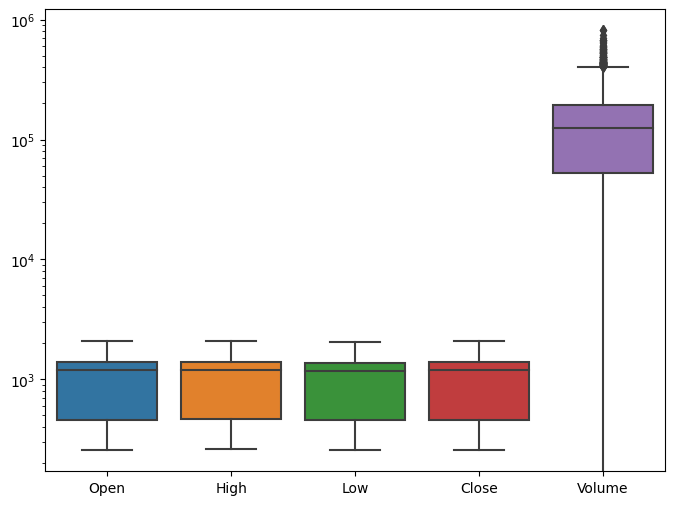

In [8]:
plt.figure(figsize=(8,6))
sb.boxplot(data=gold_df) # checking for a outlier
plt.yscale('log')
plt.show()

There are many outliers in volume in gold data

In [9]:
gold_df.describe() # statisitcal measures

,Open,High,Low,Close,Volume
count,5703.000000,5703.000000,5703.000000,5703.000000,5703.000000
mean,1040.382816,1048.339181,1031.863169,1040.298282,139141.669297
std,518.733377,522.353946,514.455903,518.524020,102537.449058
min,256.600000,259.400000,255.100000,256.600000,0.000000
25%,459.850000,463.900000,457.450000,460.500000,52938.500000
50%,1188.800000,1198.000000,1179.700000,1188.700000,126006.000000
75%,1381.400000,1392.750000,1368.100000,1383.050000,193109.000000
max,2076.400000,2089.200000,2049.000000,2069.400000,816531.000000


# 1Q

# What is the highest closing price in the dataset, and on which date did it occur? 

In [10]:
highest_close_price = gold_df['Close'].max()
closing_date = gold_df.loc[gold_df['Close'].idxmax()]['Date']
print(f"Highest closing price: {highest_close_price} on {closing_date}")

Highest closing price: 2069.4 on 2020-08-06


closing price to assess whether the asset's value increased or decreased during the trading session. 

# 2Q

# What is the lowest closing price in the dataset, and on which date did it occur?

In [34]:
lowest_close_price = gold_df['Close'].min()
closing_date = gold_df.loc[gold_df['Close'].idxmin()]['Date']
print(f"lowest closing price: {lowest_close_price} on {closing_date}")

lowest closing price: 256.6 on 2001-04-02


# 3Q

# Calculate the average volume of trading over the entire dataset.

In [11]:
average_volume = gold_df['Volume'].mean().round()
print(f" Average trading volume: {average_volume}")

 Average trading volume: 139142.0


# 4Q

# How many days had a closing price higher than the opening price?

In [12]:
days_with_higher_closing_price = (gold_df['Close'] > gold_df['Open']).sum()
print(f" Number of days with a higher closing price than opening: {days_with_higher_closing_price}")

 Number of days with a higher closing price than opening: 2903


# 5Q

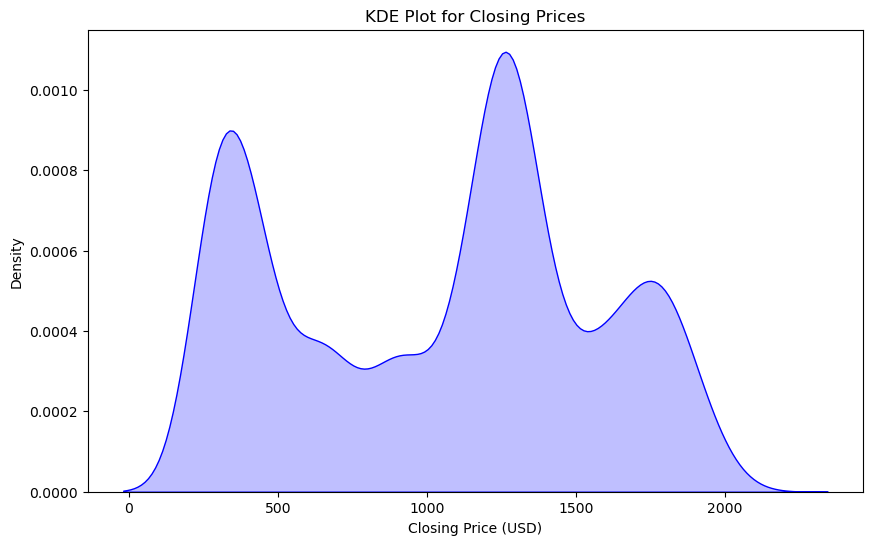

In [13]:
plt.figure(figsize=(10, 6))
sb.kdeplot(gold_df['Close'], fill=True, color="b")
plt.xlabel("Closing Price (USD)")
plt.ylabel("Density")
plt.title("KDE Plot for Closing Prices")
plt.show()

density" refers to the distribution of data points within a given range or interval. 
It provides information about how data points are spread out or concentrated across the range of values

# 6Q

# What is the distribution of 'Volume'?

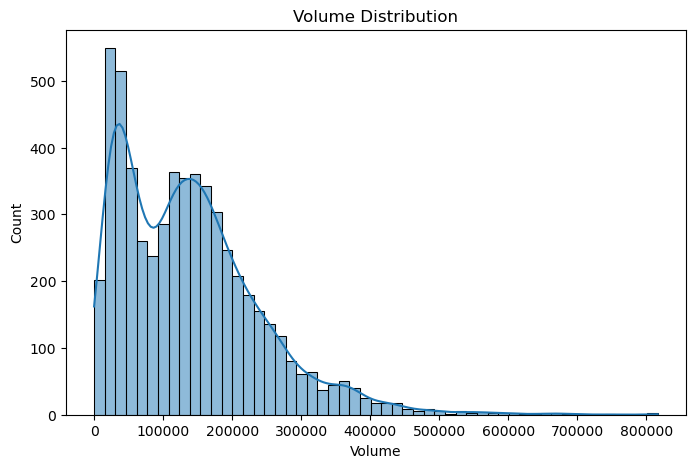

In [14]:
plt.figure(figsize=(8, 5))
sb.histplot(gold_df['Volume'], kde=True)
plt.xlabel('Volume')
plt.title('Volume Distribution')
plt.show()

# 7Q

# What is the relationship between 'High' prices and trading volumes?

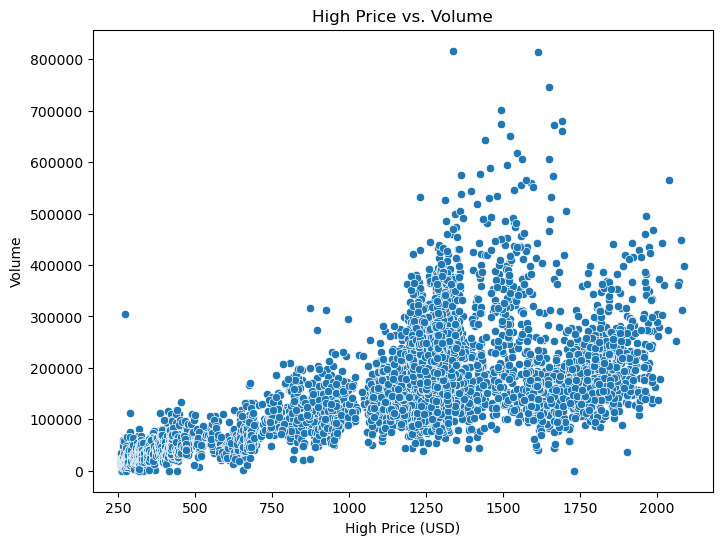

In [15]:

plt.figure(figsize=(8, 6))
sb.scatterplot(data=gold_df, x='High', y='Volume')
plt.xlabel('High Price (USD)')
plt.ylabel('Volume')
plt.title('High Price vs. Volume')
plt.show()

# 8Q

# What is the relationship between open prices and closing price?

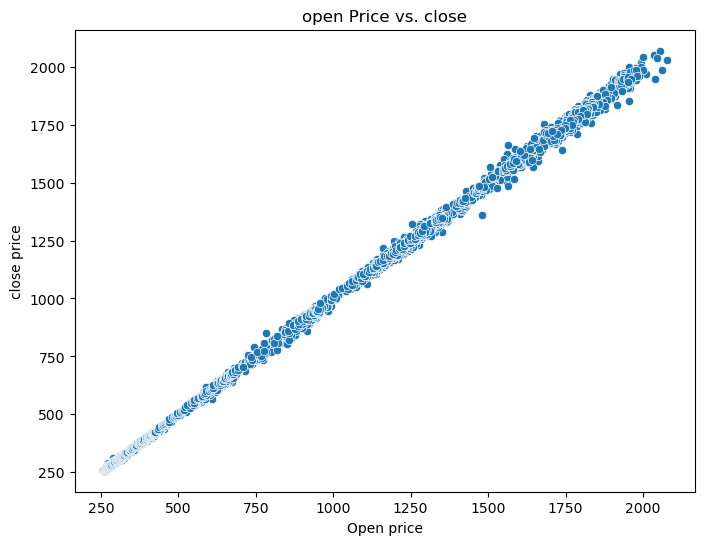

In [25]:
plt.figure(figsize=(8, 6))
sb.scatterplot(data=gold_df, x='Open', y='Close')
plt.xlabel('Open price')
plt.ylabel('close price')
plt.title('open Price vs. close')
plt.show()

# 9Q Correlation between the gold open, high, low, and close price over the  days.

In [27]:

correlation_matrix = gold_df[['Open', 'High', 'Low', 'Close']].corr()
print(" Correlation between open, high, low, and close prices over the days")
print(correlation_matrix)

 Correlation between open, high, low, and close prices over the days
           Open      High       Low     Close
Open   1.000000  0.999879  0.999825  0.999740
High   0.999879  1.000000  0.999778  0.999861
Low    0.999825  0.999778  1.000000  0.999893
Close  0.999740  0.999861  0.999893  1.000000


# 10Q

# Top 5 trading days by volume

In [23]:
top_5_trading_days = gold_df.nlargest(5, 'Volume')[['Date']]

print("Top 5 trading days by volume (Date only):")
print(top_5_trading_days)

Top 5 trading days by volume (Date only):
            Date
4239  2016-11-09
5033  2020-01-08
5068  2020-02-28
3337  2013-04-15
5064  2020-02-24
